In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
credit_data = pd.read_csv("datasets/credit_risk.csv")

In [4]:
credit_data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [5]:
# pd.get_dummies(credit_data["credit_history"])

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
over_draft                1000 non-null object
credit_usage              1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
current_balance           1000 non-null int64
Average_Credit_Balance    1000 non-null object
employment                1000 non-null object
location                  1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
cc_age                    1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

#### Selecting features
Consider all the columns except class as features. 
Class is considered as the target

In [7]:
features = credit_data.columns.drop("class")
target = ["class"]

#### Encoding the categorical variables

In [8]:
# We are not encoding class, which is the target variable in the get_dummies method().
credit_data_encoded = pd.get_dummies(credit_data[features])
credit_data_encoded["class"] = credit_data["class"]

In [9]:
credit_data_encoded.columns

Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'over_draft_0<=X<200',
       'over_draft_<0', 'over_draft_>=200', 'over_draft_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',
       'employment_unemployed', 'p

#### Splitting the data into train and test set in a ratio of 85:15

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
credit_train,credit_test = train_test_split(credit_data_encoded,test_size=0.15,random_state=100)

In [12]:
credit_train.shape, credit_test.shape

((850, 62), (150, 62))

#### Building a decision tree model

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier(max_depth=5)

In [17]:
features = credit_train.columns.drop("class")
target = ["class"]
print(len(features))
model.fit(credit_train[features],credit_train[target],)

61


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
# print(model.tree_.value)

#### Visualize the tree

In [20]:
from sklearn.tree import export_graphviz

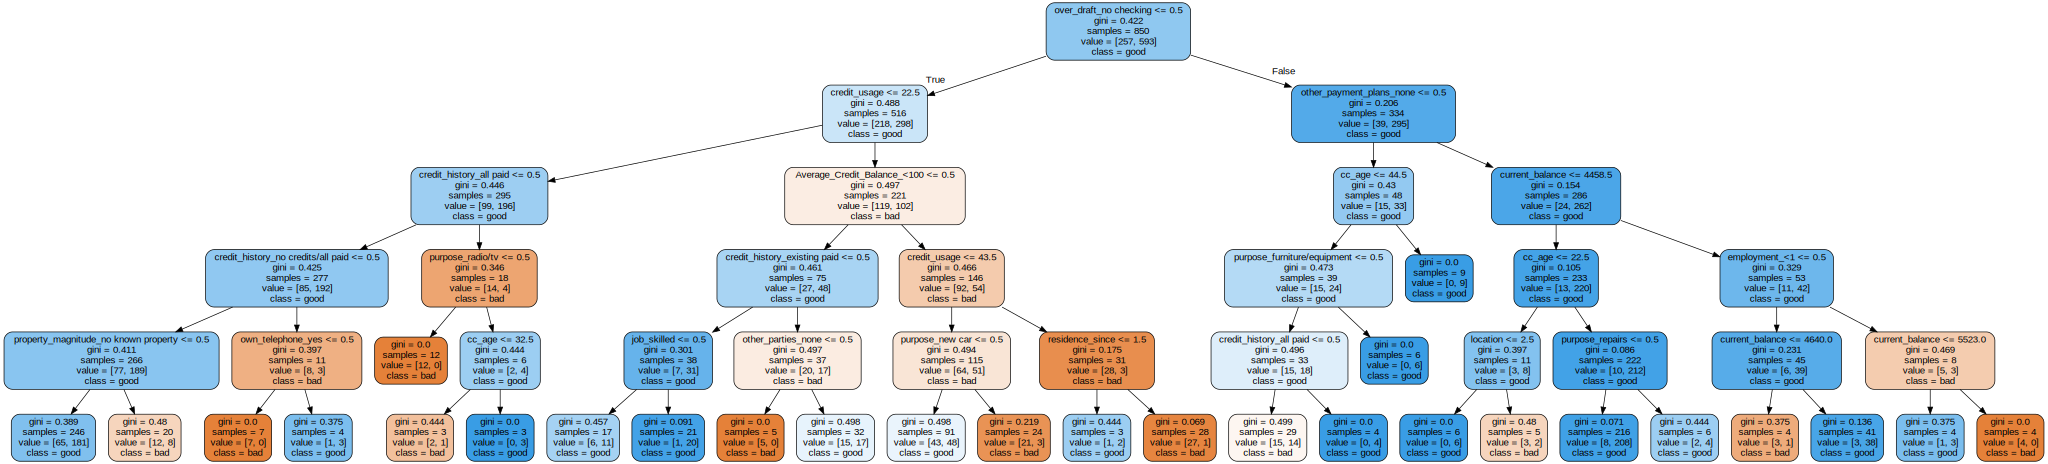

In [21]:
# Ensure that the python-graphviz package is installed.
import graphviz 
dot_data = export_graphviz(model, out_file=None,
                          feature_names=features,  
                          class_names=model.classes_,  
                          filled=True, rounded=True)
dot_data.count
graph = graphviz.Source(dot_data) 
graph
# A large tree is plotted. 
# You can effectiviely visualize a smaller one by reducing features 
# or reducing the complexity of the tree (will be explained later)

#### Evaluate model performance on train and test data

In [24]:
train_accuracy = model.score(credit_train[features],credit_train[target])
test_accuracy = model.score(credit_test[features],credit_test[target])
print(train_accuracy,test_accuracy)

0.7929411764705883 0.6533333333333333


Here you can observe that the tree looks like an overfit model. It has a 100% accuracy in train and just 67% in test. 
To avoid this problem, we need to tune certain parameters of the tree algorithm called hyper parameters

In [25]:
model1 = DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)
features = credit_train.columns.drop("class")
target = ["class"]
model1.fit(credit_train[features],credit_train[target])
train_accuracy = model1.score(credit_train[features],credit_train[target])
test_accuracy = model1.score(credit_test[features],credit_test[target])
print(train_accuracy,test_accuracy)

0.7635294117647059 0.7266666666666667


In [26]:
model2 = DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)
features = credit_train.columns.drop("class")
target = ["class"]
model2.fit(credit_train[features],credit_train[target])
train_accuracy = model2.score(credit_train[features],credit_train[target])
test_accuracy = model2.score(credit_test[features],credit_test[target])
print(train_accuracy,test_accuracy)

0.6976470588235294 0.7133333333333334


#### Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [31]:
# train_predictions = model1.predict(credit_train[features])
test_predictions = model1.predict(credit_test[features])
# train_conf_matrix = confusion_matrix(credit_train[target],train_predictions)
test_conf_matrix = confusion_matrix(credit_test[target],test_predictions)

In [32]:
# pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

In [33]:
pd.DataFrame(test_conf_matrix,columns=model.classes_,index=model.classes_)

,bad,good
bad,5,38
good,3,104


$
\begin{align}
Accuracy = \frac{No. of correct predictions}{No. of predictions made}
\end{align}
$

In [45]:
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print(train_accuracy)

0.7929411764705883


In [44]:
correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
total_predictions = train_conf_matrix.sum()
train_accuracy = correct_predictions/total_predictions
print(train_accuracy)

0.7929411764705883


# Random Forest
# Adaboost 

In [21]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(credit_train[target],train_predictions))

             precision    recall  f1-score   support

        bad       0.70      0.56      0.62       257
       good       0.82      0.90      0.86       593

avg / total       0.79      0.79      0.79       850



In [38]:
print(classification_report(credit_test[target],test_predictions))

             precision    recall  f1-score   support

        bad       0.58      0.44      0.50        43
       good       0.79      0.87      0.83       107

avg / total       0.73      0.75      0.74       150

